# M3 - PIPELINE AUTOMATION

## Import Libraries

In [7]:
import pandas as pd
from great_expectations.data_context import FileDataContext
from IPython.display import Image

## EDA

In [ ]:
df = pd.read_csv("data/P2M3_ahmad_darmawan_data_raw.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Employee_ID                  100000 non-null  int64  
 1   Department                   100000 non-null  object 
 2   Gender                       100000 non-null  object 
 3   Age                          100000 non-null  int64  
 4   Job_Title                    100000 non-null  object 
 5   Hire_Date                    100000 non-null  object 
 6   Years_At_Company             100000 non-null  int64  
 7   Education_Level              100000 non-null  object 
 8   Performance_Score            100000 non-null  int64  
 9   Monthly_Salary               100000 non-null  float64
 10  Work_Hours_Per_Week          100000 non-null  int64  
 11  Projects_Handled             100000 non-null  int64  
 12  Overtime_Hours               100000 non-null  int64  
 13  

In [4]:
df.columns

Index(['Employee_ID', 'Department', 'Gender', 'Age', 'Job_Title', 'Hire_Date',
       'Years_At_Company', 'Education_Level', 'Performance_Score',
       'Monthly_Salary', 'Work_Hours_Per_Week', 'Projects_Handled',
       'Overtime_Hours', 'Sick_Days', 'Remote_Work_Frequency', 'Team_Size',
       'Training_Hours', 'Promotions', 'Employee_Satisfaction_Score',
       'Resigned'],
      dtype='object')

In [5]:
df.head(3)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False


In [6]:
df.tail(2)

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,False
99999,100000,Finance,Female,43,Analyst,2024-03-04 08:03:05.556036,0,PhD,1,4400.0,51,43,27,11,75,13,45,1,2.64,False


In [ ]:
# mengecek missing value
df.isnull().sum()

Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

In [55]:
df.describe()

,Employee_ID,Age,Years_At_Company,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Employee_Satisfaction_Score,Resigned
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,41.029410,4.476070,2.995430,6403.211000,44.956950,24.431170,2.999088,0.100100
std,28867.657797,11.244121,2.869336,1.414726,1372.508717,8.942003,14.469584,1.150719,0.300135
min,1.000000,22.000000,0.000000,1.000000,3850.000000,30.000000,0.000000,1.000000,0.000000
25%,25000.750000,31.000000,2.000000,2.000000,5250.000000,37.000000,12.000000,2.010000,0.000000
50%,50000.500000,41.000000,4.000000,3.000000,6500.000000,45.000000,24.000000,3.000000,0.000000
75%,75000.250000,51.000000,7.000000,4.000000,7500.000000,53.000000,37.000000,3.990000,0.000000
max,100000.000000,60.000000,10.000000,5.000000,9000.000000,60.000000,49.000000,5.000000,1.000000


In [ ]:
# mengecek duplikat
df.duplicated().sum()

0

In [ ]:
# Mengecek outlier dengan metode IQR
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Menghilangkan kolom Employee_ID dari pengecekan
num_cols = [col for col in num_cols if col != "Employee_ID"]

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} ---> jumlah outlier: {len(outliers)}")


Age ---> jumlah outlier: 0
Years_At_Company ---> jumlah outlier: 0
Performance_Score ---> jumlah outlier: 0
Monthly_Salary ---> jumlah outlier: 0
Work_Hours_Per_Week ---> jumlah outlier: 0
Projects_Handled ---> jumlah outlier: 0
Overtime_Hours ---> jumlah outlier: 0
Sick_Days ---> jumlah outlier: 0
Remote_Work_Frequency ---> jumlah outlier: 0
Team_Size ---> jumlah outlier: 0
Training_Hours ---> jumlah outlier: 0
Promotions ---> jumlah outlier: 0
Employee_Satisfaction_Score ---> jumlah outlier: 0


## Tranfrom

In [54]:
## Menghapus kolom yang tidak saya gunakan
df = df.drop(columns=["Hire_Date",
    "Team_Size",
    "Training_Hours",
    "Promotions",
    "Sick_Days",
    "Overtime_Hours",
    "Remote_Work_Frequency"])

In [53]:
# Agar gampang di analisis (bool ke int)
df['Resigned'] = df['Resigned'].astype(int)
df

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,0
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,0
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,0
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,0
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,Finance,Male,27,Technician,2022-12-07 08:03:05.556036,1,Bachelor,4,4900.0,55,46,5,3,75,16,48,2,1.28,0
99996,99997,IT,Female,36,Consultant,2018-07-24 08:03:05.556036,6,Master,5,8250.0,39,35,7,0,0,10,77,1,3.48,1
99997,99998,Operations,Male,53,Analyst,2015-11-24 08:03:05.556036,8,High School,2,4800.0,31,13,6,5,0,5,87,1,2.60,0
99998,99999,HR,Female,22,Consultant,2015-08-03 08:03:05.556036,9,High School,5,8250.0,35,43,10,1,75,2,31,1,3.10,0


## Great Expectations

In [30]:
context = FileDataContext.create(project_root_dir='./')

In [31]:
# Give a name to a Datasource. This name must be unique between Datasources.
datasource_name = 'csv-data-Employee Performance and Productivity Data'
datasource = context.sources.add_pandas(datasource_name)

# Give a name to a data asset
asset_name = 'Employee-Performance'
path_to_data = 'data/P2M3_ahmad_darmawan_data_raw.csv'
asset = datasource.add_csv_asset(asset_name, filepath_or_buffer=path_to_data)

# Build batch request
batch_request = asset.build_batch_request()

In [32]:
# Creat an expectation suite
expectation_suite_name = 'expectation-Employee-Performance-dataset'
context.add_or_update_expectation_suite(expectation_suite_name)

# Create a validator using above expectation suite
validator = context.get_validator(
    batch_request = batch_request,
    expectation_suite_name = expectation_suite_name
)

# Check the validator
validator.head()

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

,Employee_ID,Department,Gender,Age,Job_Title,Hire_Date,Years_At_Company,Education_Level,Performance_Score,Monthly_Salary,Work_Hours_Per_Week,Projects_Handled,Overtime_Hours,Sick_Days,Remote_Work_Frequency,Team_Size,Training_Hours,Promotions,Employee_Satisfaction_Score,Resigned
0,1,IT,Male,55,Specialist,2022-01-19 08:03:05.556036,2,High School,5,6750.0,33,32,22,2,0,14,66,0,2.63,False
1,2,Finance,Male,29,Developer,2024-04-18 08:03:05.556036,0,High School,5,7500.0,34,34,13,14,100,12,61,2,1.72,False
2,3,Finance,Male,55,Specialist,2015-10-26 08:03:05.556036,8,High School,3,5850.0,37,27,6,3,50,10,1,0,3.17,False
3,4,Customer Support,Female,48,Analyst,2016-10-22 08:03:05.556036,7,Bachelor,2,4800.0,52,10,28,12,100,10,0,1,1.86,False
4,5,Engineering,Female,36,Analyst,2021-07-23 08:03:05.556036,3,Bachelor,2,4800.0,38,11,29,13,100,15,9,1,1.25,False


In [33]:
# Expectation 1: to be unique
validator.expect_column_values_to_be_unique('Employee_ID')

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 100000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [34]:
# Expectation 2: to be between
validator.expect_column_values_to_be_between(column='Age', min_value=22, max_value=60)

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 100000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
# Expectation 3: to be in set
validator.expect_column_values_to_be_in_set(
column='Department', value_set=['IT', 'HR', 'Finance', 'Marketing',
 'Operations', 'Sales', 'Legal', 'Customer Support', 'Engineering'])

Calculating Metrics:   0%|          | 0/8 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 100000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
# Expectation 4: to be in type list
validator.expect_column_values_to_be_in_type_list(
    'Monthly_Salary', ['integer', 'float']
    )

Calculating Metrics:   0%|          | 0/1 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": "float64"
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [37]:
# Expectation 5: not be null 
validator.expect_column_values_to_not_be_null('Performance_Score')

Calculating Metrics:   0%|          | 0/6 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 100000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": []
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [38]:
# Expectation 6: mean between 
validator.expect_column_mean_to_be_between(
    column='Monthly_Salary', min_value=2000, max_value=9000
)

Calculating Metrics:   0%|          | 0/4 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "observed_value": 6403.211
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [ ]:
# Expectation 7: value lengths between.
validator.expect_column_value_lengths_to_be_between(
    column='Job_Title', min_value=2, max_value=50)

Calculating Metrics:   0%|          | 0/9 [00:00<?, ?it/s]

{
  "success": true,
  "result": {
    "element_count": 100000,
    "unexpected_count": 0,
    "unexpected_percent": 0.0,
    "partial_unexpected_list": [],
    "missing_count": 0,
    "missing_percent": 0.0,
    "unexpected_percent_total": 0.0,
    "unexpected_percent_nonmissing": 0.0
  },
  "meta": {},
  "exception_info": {
    "raised_exception": false,
    "exception_traceback": null,
    "exception_message": null
  }
}

In [47]:
validator.save_expectation_suite(discard_failed_expectations=False)

In [48]:
checkpoint_1 = context.add_or_update_checkpoint(
    name = 'checkpoint_1',
    validator = validator,
)

In [49]:
checkpoint_result = checkpoint_1.run()

Calculating Metrics:   0%|          | 0/38 [00:00<?, ?it/s]

In [51]:
# Build data docs

context.build_data_docs()

{'local_site': 'file://c:\\Users\\ASUS\\Bootcamp\\p2-coda011-rmt-m3-darmawan-max\\gx\\uncommitted/data_docs/local_site/index.html'}

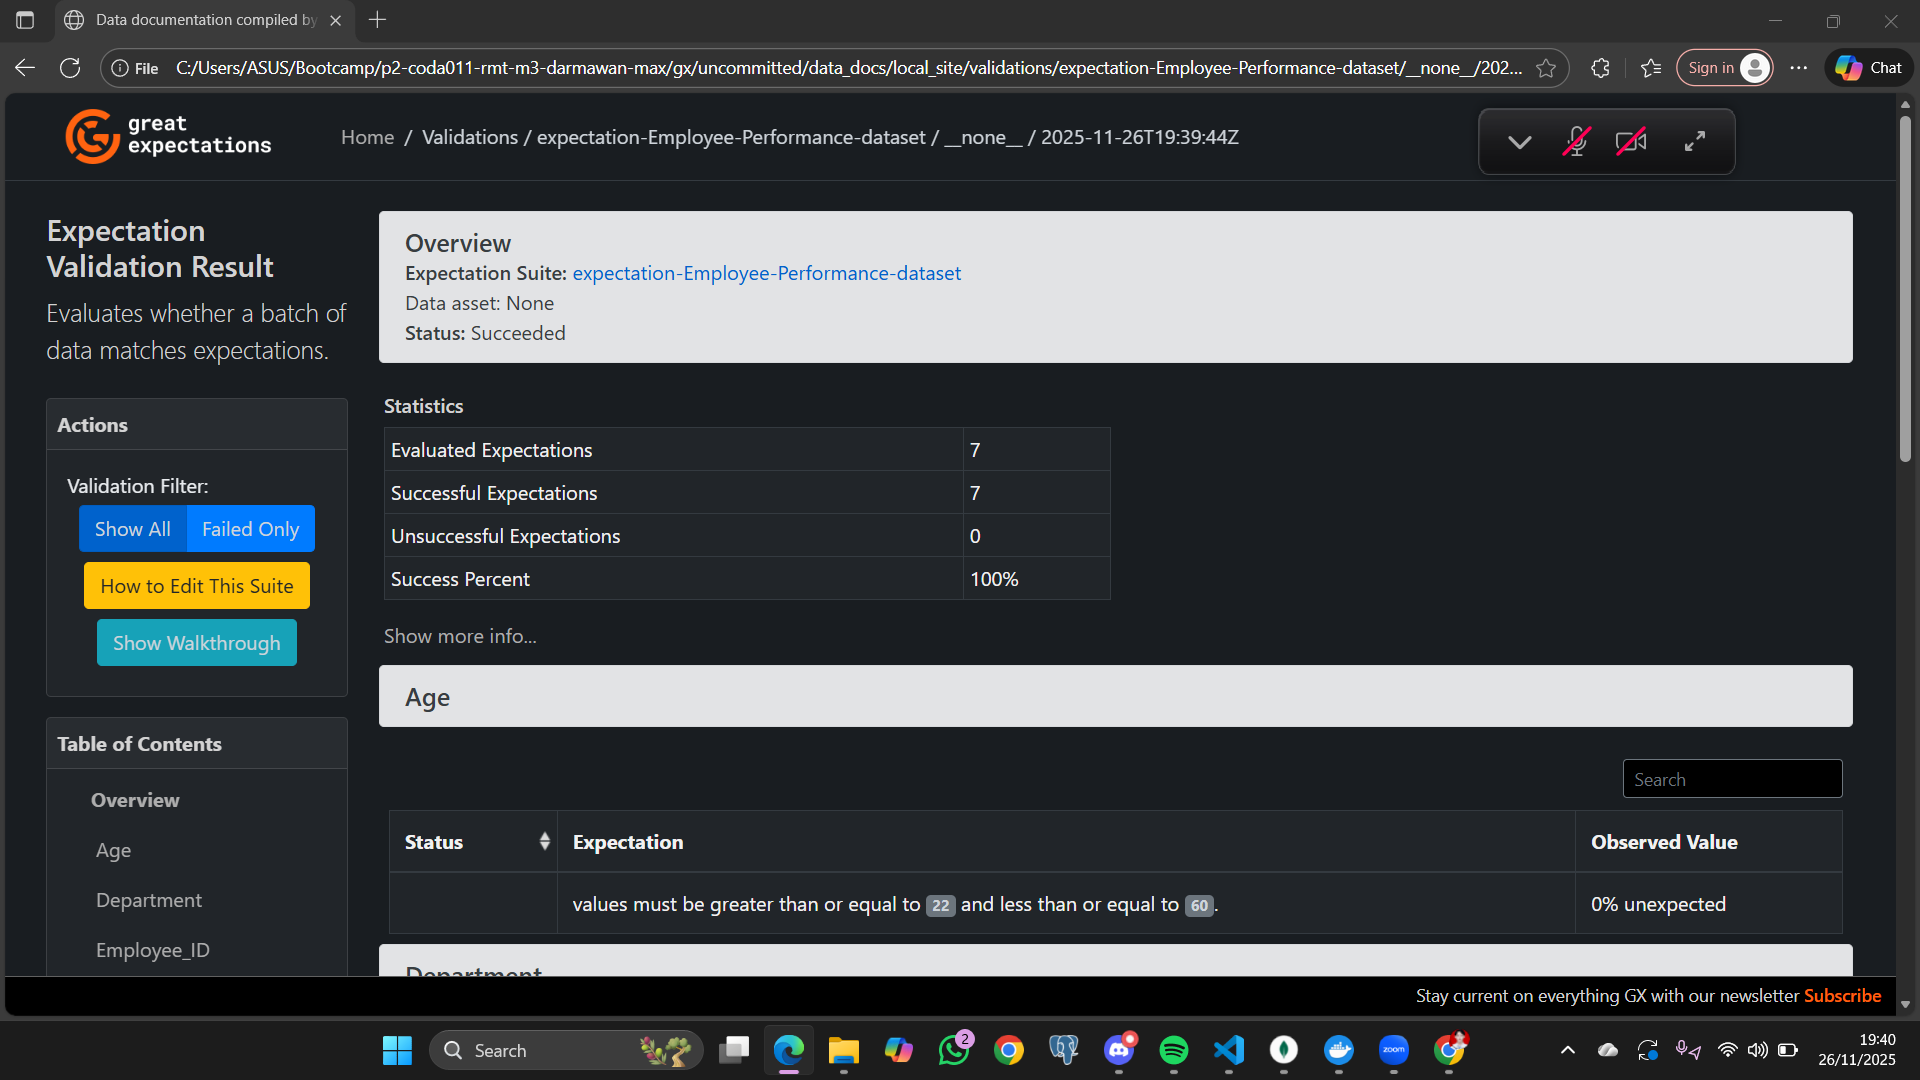

In [ ]:
Image("Screenshot (511).png")

[Buka Presentasi](https://www.canva.com/design/DAG5nYnFjL8/_HppqSjKKgbgrownCP51vg/edit?utm_content=DAG5nYnFjL8&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)